<a href="https://colab.research.google.com/github/suyash-dabral/Flower_Recognition/blob/main/Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Importing all the necessary modules



In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from google.colab import drive
import zipfile
import os


In [ ]:
img_size = 224
batch = 64
base_dir = '/content/drive/MyDrive/dataset_Flower/flowers'

In [ ]:
# Create a data augmentor
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
                                   zoom_range=0.2, horizontal_flip=True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  validation_split=0.2)

# Create datasets
train_datagen = train_datagen.flow_from_directory(base_dir,
                                                  target_size=(
                                                      img_size, img_size),
                                                  subset='training',
                                                  batch_size=batch)
test_datagen = test_datagen.flow_from_directory(base_dir,
                                                target_size=(
                                                    img_size, img_size),
                                                subset='validation',
                                                batch_size=batch)


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [ ]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same',
                 activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation="softmax"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,541,253 (24.95 MB)

 Trainable params: 6,541,253 (24.95 MB)

 Non-trainable params: 0 (0.00 B)

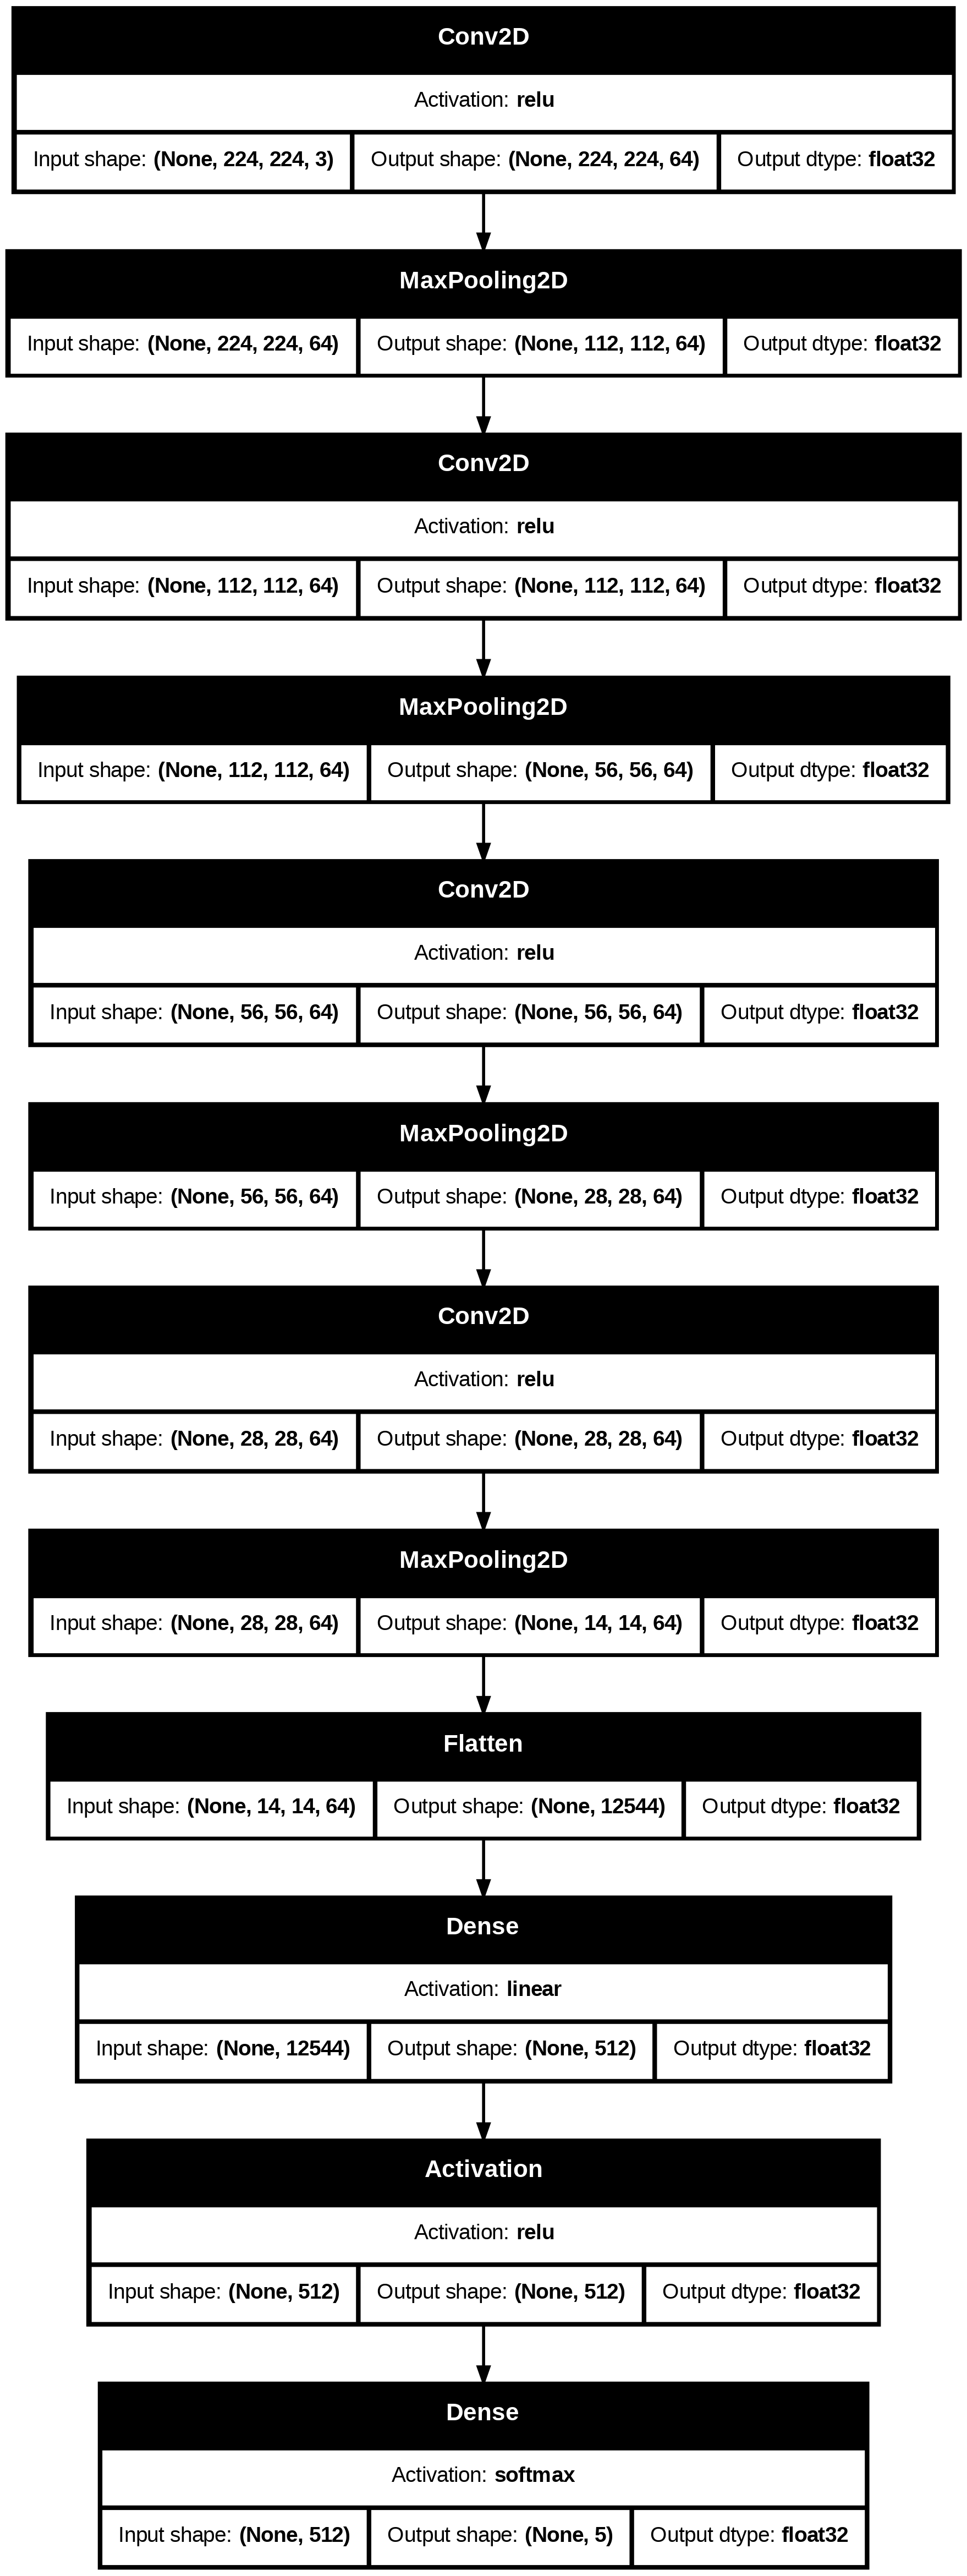

In [ ]:
keras.utils.plot_model(
    model,
    show_shapes = True,
    show_dtype = True,
    show_layer_activations = True
)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
epochs=15
model.fit(train_datagen,epochs=epochs,validation_data=test_datagen)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 1493s 25s/step - accuracy: 0.3163 - loss: 1.4952 - val_accuracy: 0.5360 - val_loss: 1.1450
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 794s 14s/step - accuracy: 0.5377 - loss: 1.1043 - val_accuracy: 0.5953 - val_loss: 1.0368
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 772s 13s/step - accuracy: 0.6184 - loss: 1.0045 - val_accuracy: 0.6198 - val_loss: 0.9408
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 733s 13s/step - accuracy: 0.6399 - loss: 0.9308 - val_accuracy: 0.6442 - val_loss: 0.9224
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 751s 13s/step - accuracy: 0.6729 - loss: 0.8614 - val_accuracy: 0.6593 - val_loss: 0.8845
Epoch 6/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 734s 13s/step - accuracy: 0.6805 - loss: 0.8134 - val_accuracy: 0.6698 - val_loss: 0.8429
Epoch 7/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 731s 13s/step - accuracy: 0.6998 - loss: 0.7639 - val_accuracy: 0.6488 - val_loss: 0.9173
Epoch 8/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 732s 13s/step - accuracy: 0.7273 - loss: 0.7240 - val_accuracy: 0.6837 - val

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/FlowerModel.h5')

# load model
#savedModel=load_model('Model.h5')
